## Ex10
- For the numbers to match up, you need to round and then SUM. THIS IS INCORRECT.

## Class

* MP #2 Due Monday 11/24
* MP #2 Presentation December 1/2
* Today -- Pandas, Matplotlib, PowerBI (pandas+posgres)
* Anytime before the the semester ends, go to the TA and have them review your PowerBI dashboard
* Final Project
    * Select a dataset which can be used for a classification problem.
    * Normalize the dataset into SQLite3

In [1]:
import pandas as pd

# Load data once for reuse
columns = ('StudentName', 'E1', 'E2', 'E3', 'E4','E5')
df = pd.read_csv("testdata_1.txt", header=None)
df.columns = columns
display(df)

,StudentName,E1,E2,E3,E4,E5
0,student1,92,77,87,77,94
1,student2,74,93,88,67,85
2,student3,83,96,74,79,92
3,student4,100,72,83,85,66
4,student5,77,96,66,79,92
5,student6,100,86,84,70,71
6,student7,66,91,94,97,80
7,student8,97,86,75,69,88
8,student9,95,98,99,85,86
9,student10,78,76,73,88,86


In [2]:
df[2:10]

,StudentName,E1,E2,E3,E4,E5
2,student3,83,96,74,79,92
3,student4,100,72,83,85,66
4,student5,77,96,66,79,92
5,student6,100,86,84,70,71
6,student7,66,91,94,97,80
7,student8,97,86,75,69,88
8,student9,95,98,99,85,86
9,student10,78,76,73,88,86


In [3]:
df["StudentName"]

0     student1
1     student2
2     student3
3     student4
4     student5
5     student6
6     student7
7     student8
8     student9
9    student10
Name: StudentName, dtype: object

In [4]:
df[["StudentName", "E1"]]

,StudentName,E1
0,student1,92
1,student2,74
2,student3,83
3,student4,100
4,student5,77
5,student6,100
6,student7,66
7,student8,97
8,student9,95
9,student10,78


In [7]:
df.loc[0]

StudentName    student1
E1                   92
E2                   77
E3                   87
E4                   77
E5                   94
Name: 0, dtype: object

In [9]:
# Set StudentName as index
df_indexed = df.set_index('StudentName')
display(df_indexed)

,E1,E2,E3,E4,E5
StudentName,,,,,
student1,92,77,87,77,94
student2,74,93,88,67,85
student3,83,96,74,79,92
student4,100,72,83,85,66
student5,77,96,66,79,92
student6,100,86,84,70,71
student7,66,91,94,97,80
student8,97,86,75,69,88
student9,95,98,99,85,86


In [10]:
# Set StudentName as index
display(df_indexed.loc['student4'])

E1    100
E2     72
E3     83
E4     85
E5     66
Name: student4, dtype: int64

In [11]:
import pandas as pd
columns = ('StudentName', 'E1', 'E2', 'E3', 'E4','E5')
df = pd.DataFrame(data=[ele.strip().split(',') for ele in open('testdata_1.txt')], columns=columns)
for idx, row in df.iterrows():
    print(idx, row)

0 StudentName    student1
E1                   92
E2                   77
E3                   87
E4                   77
E5                   94
Name: 0, dtype: object
1 StudentName    student2
E1                   74
E2                   93
E3                   88
E4                   67
E5                   85
Name: 1, dtype: object
2 StudentName    student3
E1                   83
E2                   96
E3                   74
E4                   79
E5                   92
Name: 2, dtype: object
3 StudentName    student4
E1                  100
E2                   72
E3                   83
E4                   85
E5                   66
Name: 3, dtype: object
4 StudentName    student5
E1                   77
E2                   96
E3                   66
E4                   79
E5                   92
Name: 4, dtype: object
5 StudentName    student6
E1                  100
E2                   86
E3                   84
E4                   70
E5                   71
Name: 5, 

In [13]:
import numpy as np
header = ['exam1', 'exam2', 'exam3']
data = np.random.randint(65, 101, 12).reshape(4,3)
students = ['student1', 'student2', 'student3', 'student4']
df = pd.DataFrame(data=data, index=students, columns=header)
df

,exam1,exam2,exam3
student1,78,78,77
student2,93,88,94
student3,66,83,68
student4,78,74,96


In [16]:
df.loc['student1', ['exam1', 'exam2']]

exam1    78
exam2    78
Name: student1, dtype: int64

In [18]:
header = ['exam1', 'exam2', 'exam3']
data = np.random.randint(65, 101, 12).reshape(4,3)
students = ['student1', 'student2', 'student3', 'student4']
df = pd.DataFrame(data=data, columns=header)
df

,exam1,exam2,exam3
0,82,72,76
1,89,91,83
2,83,72,93
3,85,69,82


In [19]:
df['name'] = students
df

,exam1,exam2,exam3,name
0,82,72,76,student1
1,89,91,83,student2
2,83,72,93,student3
3,85,69,82,student4


In [20]:
df.set_index('name', inplace=True)
df.loc['student1']

exam1    82
exam2    72
exam3    76
Name: student1, dtype: int64

In [21]:
students = 'student1 student1 student1 student2 student2 student2 student3 student3 student3'
exams = 'exam1 exam2 exam3'.split()*3
classes = 'class1 class2'
index = list(zip(students.split(), exams))
index = pd.MultiIndex.from_tuples(index)
df = pd.DataFrame(np.random.randint(65, 101, 3*3*2).reshape(9,2) , index, classes.split())
df.loc['student1'].loc['exam1']['class1']
df.index.names
df.index.names = ['Students', 'Exams']

df

class1  class2
Students Exams                
student1 exam1      75      69
         exam2      77      73
         exam3      81      77
student2 exam1      94      78
         exam2      86      75
         exam3      94      90
student3 exam1      90      98
         exam2      72      74
         exam3      67      79

In [28]:
df.loc['student1', 'exam1']

class1    75
class2    69
Name: (student1, exam1), dtype: int64

In [29]:
df

class1  class2
Students Exams                
student1 exam1      75      69
         exam2      77      73
         exam3      81      77
student2 exam1      94      78
         exam2      86      75
         exam3      94      90
student3 exam1      90      98
         exam2      72      74
         exam3      67      79

In [30]:
df.loc['exam1']

KeyError: 'exam1'

In [31]:
df.xs('exam1', level='Exams')

,class1,class2
Students,,
student1,75,69
student2,94,78
student3,90,98


In [32]:
my_dict = {'student1': [90, 84, np.nan], 'student2': [77, np.nan, np.nan], 'student3': [88, 65, 93]}
df = pd.DataFrame(my_dict)

df

,student1,student2,student3
0,90.0,77.0,88
1,84.0,NaN,65
2,NaN,NaN,93


In [34]:
df.dropna(axis=0)

,student1,student2,student3
0,90.0,77.0,88


In [33]:
df.dropna()

,student1,student2,student3
0,90.0,77.0,88


In [35]:
df.dropna(axis=1)

,student3
0,88
1,65
2,93


In [36]:
df.dropna(thresh=2)

,student1,student2,student3
0,90.0,77.0,88
1,84.0,NaN,65


In [37]:
df.fillna(value=55)


,student1,student2,student3
0,90.0,77.0,88
1,84.0,55.0,65
2,55.0,55.0,93


In [38]:
df

,student1,student2,student3
0,90.0,77.0,88
1,84.0,NaN,65
2,NaN,NaN,93


In [39]:

df.drop(axis=0, labels=[1,2])

,student1,student2,student3
0,90.0,77.0,88


In [40]:
df.drop(axis=1, columns=['student1'])

,student2,student3
0,77.0,88
1,NaN,65
2,NaN,93


In [41]:
import pandas as pd
import numpy as np

my_dict = {
    'Exams': 'exam1 exam1 exam1'.split() + 'exam2 exam2 exam2'.split() + 'exam3 exam3 exam3'.split(),
    'Students': 'student1 student2 student3'.split()*3,
    'Scores': np.random.randint(65,101,9)
}
df = pd.DataFrame(my_dict)

df

,Exams,Students,Scores
0,exam1,student1,71
1,exam1,student2,82
2,exam1,student3,74
3,exam2,student1,99
4,exam2,student2,90
5,exam2,student3,67
6,exam3,student1,69
7,exam3,student2,87
8,exam3,student3,80


In [43]:
df.mean(numeric_only=True)

Scores    79.888889
dtype: float64

In [44]:
df

,Exams,Students,Scores
0,exam1,student1,71
1,exam1,student2,82
2,exam1,student3,74
3,exam2,student1,99
4,exam2,student2,90
5,exam2,student3,67
6,exam3,student1,69
7,exam3,student2,87
8,exam3,student3,80


In [45]:
df.groupby('Students').mean(numeric_only=True)

,Scores
Students,
student1,79.666667
student2,86.333333
student3,73.666667


In [46]:
df.groupby('Students').mean(numeric_only=True).loc['student1']

Scores    79.666667
Name: student1, dtype: float64

In [47]:
df.groupby('Exams').max(numeric_only=True)['Scores']

Exams
exam1    82
exam2    99
exam3    87
Name: Scores, dtype: int64

In [48]:
df.groupby('Exams').describe()

Scores                                                    
       count       mean        std   min   25%   50%   75%   max
Exams                                                           
exam1    3.0  75.666667   5.686241  71.0  72.5  74.0  78.0  82.0
exam2    3.0  85.333333  16.502525  67.0  78.5  90.0  94.5  99.0
exam3    3.0  78.666667   9.073772  69.0  74.5  80.0  83.5  87.0

In [49]:
df.groupby('Students').describe()

Scores                                                    
          count       mean        std   min   25%   50%   75%   max
Students                                                           
student1    3.0  79.666667  16.772994  69.0  70.0  71.0  85.0  99.0
student2    3.0  86.333333   4.041452  82.0  84.5  87.0  88.5  90.0
student3    3.0  73.666667   6.506407  67.0  70.5  74.0  77.0  80.0

In [50]:
df.groupby('Students').describe().transpose()

Students       student1   student2   student3
Scores count   3.000000   3.000000   3.000000
       mean   79.666667  86.333333  73.666667
       std    16.772994   4.041452   6.506407
       min    69.000000  82.000000  67.000000
       25%    70.000000  84.500000  70.500000
       50%    71.000000  87.000000  74.000000
       75%    85.000000  88.500000  77.000000
       max    99.000000  90.000000  80.000000

In [51]:
import pandas as pd
import numpy as np
my_dict = {
  'Exams': 'exam1 exam1 exam1'.split() + 'exam2 exam2 exam2'.split() + 'exam3 exam3 exam3'.split(),
  'Students': 'student1 student2 student3'.split() * 3,
  'Scores': np.random.randint(65, 101, 9)
}
df = pd.DataFrame(my_dict)

# Select only numeric columns
new_df = df.set_index("Students")
new_df.select_dtypes(include=[np.number])

,Scores
Students,
student1,90
student2,97
student3,99
student1,82
student2,99
student3,91
student1,98
student2,67
student3,87


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Exams     9 non-null      object
 1   Students  9 non-null      object
 2   Scores    9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 348.0+ bytes


In [56]:
new_df.select_dtypes(include=[object])

,Exams
Students,
student1,exam1
student2,exam1
student3,exam1
student1,exam2
student2,exam2
student3,exam2
student1,exam3
student2,exam3
student3,exam3


In [57]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with a multi-level index
data = {
  'Scores': np.random.randint(65, 101, 9),
}
index = pd.MultiIndex.from_tuples(
  [('student1', 'exam1'), ('student1', 'exam2'), ('student1', 'exam3'),
   ('student2', 'exam1'), ('student2', 'exam2'), ('student2', 'exam3'),
   ('student3', 'exam1'), ('student3', 'exam2'), ('student3', 'exam3')],
  names=['Students', 'Exams']
)

df = pd.DataFrame(data, index=index)
# Group by the first level of the index ('Students')
grouped_df = df.groupby(level='Students').mean()

display(grouped_df)

,Scores
Students,
student1,94.666667
student2,80.666667
student3,88.666667


In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [59]:
departments = {
    'DepartmentId': [1, 2, 3, 4],
    'DepartmentName': ['IT', 'Physics', 'Arts', 'Math']
}

df1 = pd.DataFrame(departments)

students = {
    'StudentId': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'StudentName': ['Michael', 'John', 'Jack', 'Sara', 'Sally', 'Jena', 'Nancy', 'Adam', 'Stevens', 'George'],
    'DepartmentId': [1, 1, 1, 2, 2, np.nan, 2, 3, 3, np.nan]
}

df2 = pd.DataFrame(students)

marks = {
    'MarkId': [1, 2, 3, 4, 5, 6, 7, 8],
    'StudentId': [1, 2, 3, 4, 5, 6, 7, 8],
    'Mark': [18, 20, 16, 19, 14, 20, 20, 20]
}

df3 = pd.DataFrame(marks)

pd.merge(df2, df1, how='inner', on='DepartmentId')
pd.merge(df1, df2, how='inner', on='DepartmentId')
pd.merge(df1, df2, how='outer', on='DepartmentId')
pd.merge(df2, df1, how='right', on='DepartmentId')

pd.merge(df3, pd.merge(df2, df1, how='inner', on='DepartmentId'), how='inner', on='StudentId')
data = pd.merge(df3, pd.merge(df2, df1, how='inner', on='DepartmentId'), how='inner', on='StudentId')

data[['StudentName', 'Mark', 'DepartmentName']]


,StudentId,StudentName,DepartmentId,DepartmentName
0,1,Michael,1.0,IT
1,2,John,1.0,IT
2,3,Jack,1.0,IT
3,4,Sara,2.0,Physics
4,5,Sally,2.0,Physics
5,7,Nancy,2.0,Physics
6,8,Adam,3.0,Arts
7,9,Stevens,3.0,Arts


,DepartmentId,DepartmentName,StudentId,StudentName
0,1,IT,1,Michael
1,1,IT,2,John
2,1,IT,3,Jack
3,2,Physics,4,Sara
4,2,Physics,5,Sally
5,2,Physics,7,Nancy
6,3,Arts,8,Adam
7,3,Arts,9,Stevens


,DepartmentId,DepartmentName,StudentId,StudentName
0,1.0,IT,1.0,Michael
1,1.0,IT,2.0,John
2,1.0,IT,3.0,Jack
3,2.0,Physics,4.0,Sara
4,2.0,Physics,5.0,Sally
5,2.0,Physics,7.0,Nancy
6,3.0,Arts,8.0,Adam
7,3.0,Arts,9.0,Stevens
8,4.0,Math,NaN,NaN
9,NaN,NaN,6.0,Jena


,StudentId,StudentName,DepartmentId,DepartmentName
0,1.0,Michael,1.0,IT
1,2.0,John,1.0,IT
2,3.0,Jack,1.0,IT
3,4.0,Sara,2.0,Physics
4,5.0,Sally,2.0,Physics
5,7.0,Nancy,2.0,Physics
6,8.0,Adam,3.0,Arts
7,9.0,Stevens,3.0,Arts
8,NaN,NaN,4.0,Math


,MarkId,StudentId,Mark,StudentName,DepartmentId,DepartmentName
0,1,1,18,Michael,1.0,IT
1,2,2,20,John,1.0,IT
2,3,3,16,Jack,1.0,IT
3,4,4,19,Sara,2.0,Physics
4,5,5,14,Sally,2.0,Physics
5,7,7,20,Nancy,2.0,Physics
6,8,8,20,Adam,3.0,Arts


,StudentName,Mark,DepartmentName
0,Michael,18,IT
1,John,20,IT
2,Jack,16,IT
3,Sara,19,Physics
4,Sally,14,Physics
5,Nancy,20,Physics
6,Adam,20,Arts


In [60]:
d1 = {
    'C0': ['C0R0', 'C0R1', 'C0R2'],
    'C1': ['C1R0', 'C1R1', 'C2R2'],
    'C2': ['C2R0', 'C2R1', 'C2R2'],
}

df1 = pd.DataFrame(d1)

d2 = {
    'C0': ['C0R3', 'C0R4', 'C0R5'],
    'C1': ['C1R3', 'C1R4', 'C1R5'],
    'C2': ['C2R3', 'C2R4', 'C2R5'],
}

df2 = pd.DataFrame(d2)

d3 = {
    'C0': ['C0R6', 'C0R7', 'C0R8'],
    'C1': ['C1R6', 'C1R7', 'C1R8'],
    'C2': ['C2R6', 'C2R7', 'C2R8'],
}

df3 = pd.DataFrame(d3)

pd.concat([df1, df2, df3])

## Concatenation -- Fix index

d1 = {
    'C0': ['COR0', 'COR1', 'COR2'],
    'C1': ['C1R0', 'C1R1', 'C2R2'],
    'C2': ['C2R0', 'C2R1', 'C2R2'],
}

df1 = pd.DataFrame(d1, index=[1, 2, 3])

d2 = {
    'C0': ['C0R3', 'C0R4', 'C0R5'],
    'C1': ['C1R3', 'C1R4', 'C1R5'],
    'C2': ['C2R3', 'C2R4', 'C2R5'],
}

df2 = pd.DataFrame(d2, index=[4, 5, 6])

d3 = {
    'C0': ['C0R6', 'C0R7', 'C0R8'],
    'C1': ['C1R6', 'C1R7', 'C1R8'],
    'C2': ['C2R6', 'C2R7', 'C2R8'],
}

df3 = pd.DataFrame(d3, index=[7, 8, 9])

pd.concat([df1, df2, df3])

# Better way

d1 = {
    'C0': ['C0R0', 'C0R1', 'C0R2'],
    'C1': ['C1R0', 'C1R1', 'C2R2'],
    'C2': ['C2R0', 'C2R1', 'C2R2'],
}

df1 = pd.DataFrame(d1)

d2 = {
    'C0': ['C0R3', 'C0R4', 'C0R5'],
    'C1': ['C1R3', 'C1R4', 'C1R5'],
    'C2': ['C2R3', 'C2R4', 'C2R5'],
}

df2 = pd.DataFrame(d2)

d3 = {
    'C0': ['C0R6', 'C0R7', 'C0R8'],
    'C1': ['C1R6', 'C1R7', 'C1R8'],
    'C2': ['C2R6', 'C2R7', 'C2R8'],
}

df3 = pd.DataFrame(d3)

concat = pd.concat([df1, df2, df3])
concat = concat.reset_index().drop("index", axis=1)
concat

,C0,C1,C2
0,C0R0,C1R0,C2R0
1,C0R1,C1R1,C2R1
2,C0R2,C2R2,C2R2
0,C0R3,C1R3,C2R3
1,C0R4,C1R4,C2R4
2,C0R5,C1R5,C2R5
0,C0R6,C1R6,C2R6
1,C0R7,C1R7,C2R7
2,C0R8,C1R8,C2R8


,C0,C1,C2
1,COR0,C1R0,C2R0
2,COR1,C1R1,C2R1
3,COR2,C2R2,C2R2
4,C0R3,C1R3,C2R3
5,C0R4,C1R4,C2R4
6,C0R5,C1R5,C2R5
7,C0R6,C1R6,C2R6
8,C0R7,C1R7,C2R7
9,C0R8,C1R8,C2R8


,C0,C1,C2
0,C0R0,C1R0,C2R0
1,C0R1,C1R1,C2R1
2,C0R2,C2R2,C2R2
3,C0R3,C1R3,C2R3
4,C0R4,C1R4,C2R4
5,C0R5,C1R5,C2R5
6,C0R6,C1R6,C2R6
7,C0R7,C1R7,C2R7
8,C0R8,C1R8,C2R8


In [61]:
concat = pd.concat([df1, df2, df3])
concat

,C0,C1,C2
0,C0R0,C1R0,C2R0
1,C0R1,C1R1,C2R1
2,C0R2,C2R2,C2R2
0,C0R3,C1R3,C2R3
1,C0R4,C1R4,C2R4
2,C0R5,C1R5,C2R5
0,C0R6,C1R6,C2R6
1,C0R7,C1R7,C2R7
2,C0R8,C1R8,C2R8


In [63]:
concat.reset_index().drop('index', axis=1)

,C0,C1,C2
0,C0R0,C1R0,C2R0
1,C0R1,C1R1,C2R1
2,C0R2,C2R2,C2R2
3,C0R3,C1R3,C2R3
4,C0R4,C1R4,C2R4
5,C0R5,C1R5,C2R5
6,C0R6,C1R6,C2R6
7,C0R7,C1R7,C2R7
8,C0R8,C1R8,C2R8


In [64]:
data['DepartmentName'].unique()
data['DepartmentName'].nunique()
data['DepartmentName'].value_counts()
data[data['Mark']>17]

array(['IT', 'Physics', 'Arts'], dtype=object)

3

DepartmentName
IT         3
Physics    3
Arts       1
Name: count, dtype: int64

,MarkId,StudentId,Mark,StudentName,DepartmentId,DepartmentName
0,1,1,18,Michael,1.0,IT
1,2,2,20,John,1.0,IT
3,4,4,19,Sara,2.0,Physics
5,7,7,20,Nancy,2.0,Physics
6,8,8,20,Adam,3.0,Arts


In [65]:

def times5(val):
    return val * 5

data['Mark'].apply(times5)

data['Mark'].apply(lambda val: val*5)


0     90
1    100
2     80
3     95
4     70
5    100
6    100
Name: Mark, dtype: int64

0     90
1    100
2     80
3     95
4     70
5    100
6    100
Name: Mark, dtype: int64

In [66]:
def upper(string):
    return string.upper()

data['DepartmentName'].apply(upper)

data['DepartmentName'].apply(lambda string: string.upper())

0         IT
1         IT
2         IT
3    PHYSICS
4    PHYSICS
5    PHYSICS
6       ARTS
Name: DepartmentName, dtype: object

0         IT
1         IT
2         IT
3    PHYSICS
4    PHYSICS
5    PHYSICS
6       ARTS
Name: DepartmentName, dtype: object

In [68]:

mapping = {18: 'B', 14: 'C', 19: 'A-', 20: 'A+'}
data['Mark'].map(mapping)



0      B
1     A+
2    NaN
3     A-
4      C
5     A+
6     A+
Name: Mark, dtype: object

In [70]:
data.head()
data.head(2)

data.tail()
data.tail(3)

data.shape
data.iloc[3]
data.columns
data.dtypes
data.info()
data.value_counts()
data.describe()

,MarkId,StudentId,Mark,StudentName,DepartmentId,DepartmentName
0,1,1,18,Michael,1.0,IT
1,2,2,20,John,1.0,IT
2,3,3,16,Jack,1.0,IT
3,4,4,19,Sara,2.0,Physics
4,5,5,14,Sally,2.0,Physics


,MarkId,StudentId,Mark,StudentName,DepartmentId,DepartmentName
0,1,1,18,Michael,1.0,IT
1,2,2,20,John,1.0,IT


,MarkId,StudentId,Mark,StudentName,DepartmentId,DepartmentName
2,3,3,16,Jack,1.0,IT
3,4,4,19,Sara,2.0,Physics
4,5,5,14,Sally,2.0,Physics
5,7,7,20,Nancy,2.0,Physics
6,8,8,20,Adam,3.0,Arts


,MarkId,StudentId,Mark,StudentName,DepartmentId,DepartmentName
4,5,5,14,Sally,2.0,Physics
5,7,7,20,Nancy,2.0,Physics
6,8,8,20,Adam,3.0,Arts


(7, 6)

MarkId                  4
StudentId               4
Mark                   19
StudentName          Sara
DepartmentId          2.0
DepartmentName    Physics
Name: 3, dtype: object

Index(['MarkId', 'StudentId', 'Mark', 'StudentName', 'DepartmentId',
       'DepartmentName'],
      dtype='object')

MarkId              int64
StudentId           int64
Mark                int64
StudentName        object
DepartmentId      float64
DepartmentName     object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MarkId          7 non-null      int64  
 1   StudentId       7 non-null      int64  
 2   Mark            7 non-null      int64  
 3   StudentName     7 non-null      object 
 4   DepartmentId    7 non-null      float64
 5   DepartmentName  7 non-null      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.0+ bytes


MarkId  StudentId  Mark  StudentName  DepartmentId  DepartmentName
1       1          18    Michael      1.0           IT                1
2       2          20    John         1.0           IT                1
3       3          16    Jack         1.0           IT                1
4       4          19    Sara         2.0           Physics           1
5       5          14    Sally        2.0           Physics           1
7       7          20    Nancy        2.0           Physics           1
8       8          20    Adam         3.0           Arts              1
Name: count, dtype: int64

,MarkId,StudentId,Mark,DepartmentId
count,7.000000,7.000000,7.000000,7.000000
mean,4.285714,4.285714,18.142857,1.714286
std,2.563480,2.563480,2.340126,0.755929
min,1.000000,1.000000,14.000000,1.000000
25%,2.500000,2.500000,17.000000,1.000000
50%,4.000000,4.000000,19.000000,2.000000
75%,6.000000,6.000000,20.000000,2.000000
max,8.000000,8.000000,20.000000,3.000000


In [71]:
data[data['exam1'].between(75, 85)]
data[data['exam1'].isin([75, 85, 95])]
data['exam1'].unique()
data['exam1'].nunique()
np.sort(data['exam1'].unique())

KeyError: 'exam1'

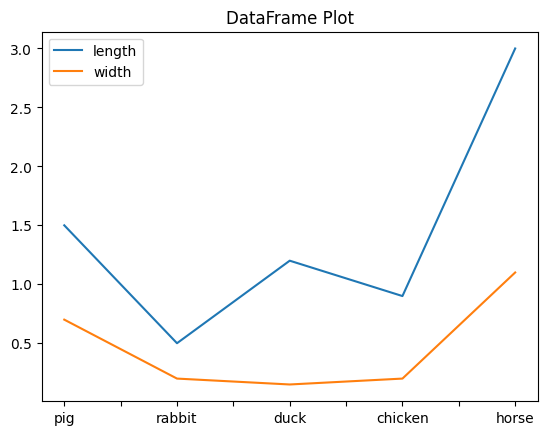

In [74]:
>>> df = pd.DataFrame({'length': [1.5, 0.5, 1.2, 0.9, 3],
...                   'width': [0.7, 0.2, 0.15, 0.2, 1.1]},
...                   index=['pig', 'rabbit', 'duck', 'chicken', 'horse'])
>>> plot = df.plot(title="DataFrame Plot")

In [73]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 15.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 12.8 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [76]:
s = pd.Series(range(5))
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [80]:
t = pd.Series([True, False, True])

In [81]:
t

0     True
1    False
2     True
dtype: bool

In [83]:
s.where(t, 100)

0      0
1    100
2      2
3    100
4    100
dtype: int64

In [84]:
s.mask(t, 100)

0    100
1      1
2    100
3    100
4    100
dtype: int64